RandomUnderSampler:
Diabetes_binary
0                  35346
1                  35346
Name: count, dtype: int64
-- Epoch 1
Norm: 1.08, NNZs: 21, Bias: -0.608634, T: 56553, Avg. loss: 0.525551
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 21, Bias: -0.644806, T: 113106, Avg. loss: 0.519118
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 21, Bias: -0.670114, T: 169659, Avg. loss: 0.519061
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 21, Bias: -0.653120, T: 226212, Avg. loss: 0.519217
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 21, Bias: -0.633979, T: 282765, Avg. loss: 0.519142
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.09, NNZs: 21, Bias: -0.644091, T: 339318, Avg. loss: 0.519093
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.10, NNZs: 21, Bias: -0.654261, T: 395871, Avg. loss: 0.519140
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds



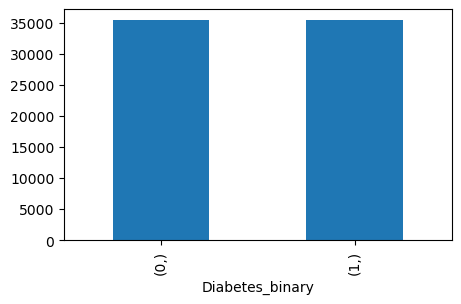

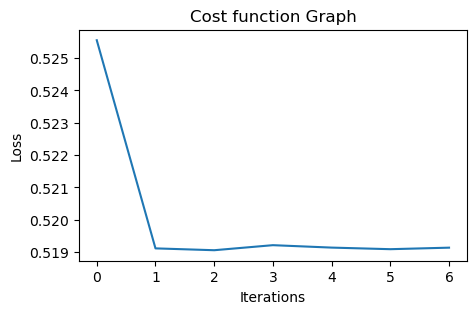

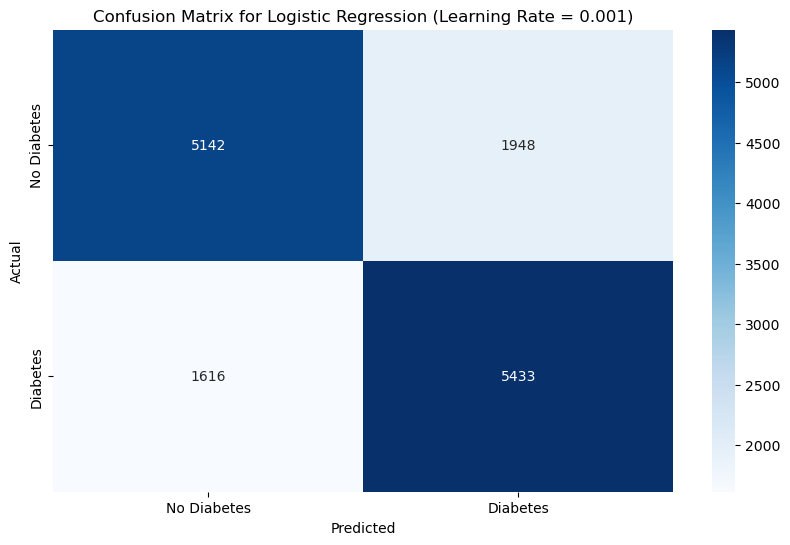

Classification Report for Logistic Regression (Learning Rate = 0.001):
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Specificity:         72.5 

Sensitivity:         77.10000000000001 (Recall)
-- Epoch 1
Norm: 1.17, NNZs: 21, Bias: -0.595217, T: 56553, Avg. loss: 0.529530
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 21, Bias: -0.640798, T: 113106, Avg. loss: 0.528856
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 21, Bias: -0.673519, T: 169659, Avg. loss: 0.528838
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.24, NNZs: 21, Bias: -0.656219, T: 226212, Avg. loss: 0.529007
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.22, NNZs: 21, Bias: -0.645120, T: 282765, Av

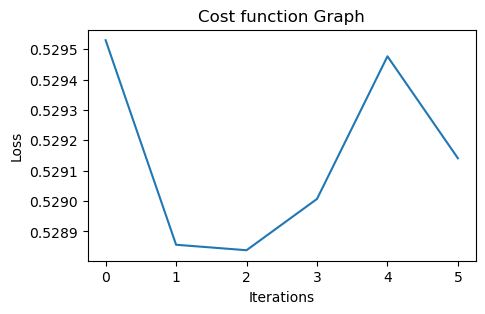

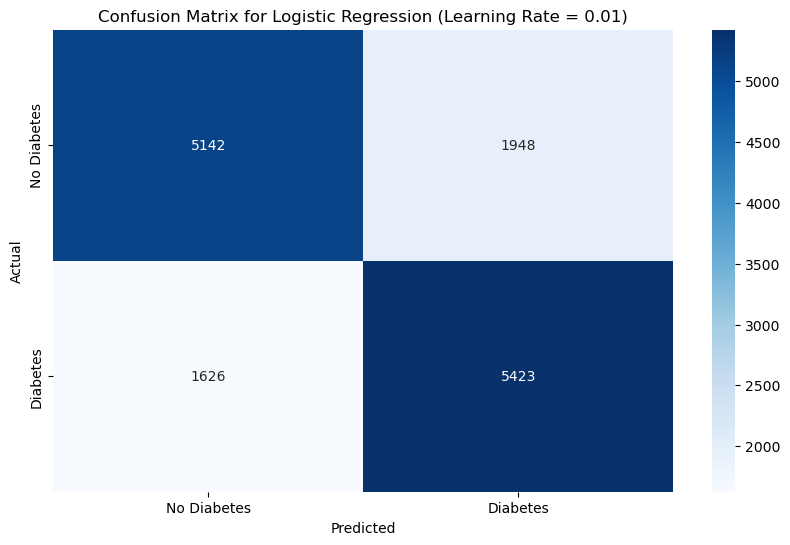

Classification Report for Logistic Regression (Learning Rate = 0.01):
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Specificity:         72.5 

Sensitivity:         76.9 (Recall)
-- Epoch 1
Norm: 2.07, NNZs: 21, Bias: -0.164302, T: 56553, Avg. loss: 0.671444
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.98, NNZs: 21, Bias: -0.517489, T: 113106, Avg. loss: 0.674348
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 21, Bias: -0.815212, T: 169659, Avg. loss: 0.672382
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 21, Bias: -0.575342, T: 226212, Avg. loss: 0.671581
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 21, Bias: -0.973728, T: 282765, Avg. loss: 0.673

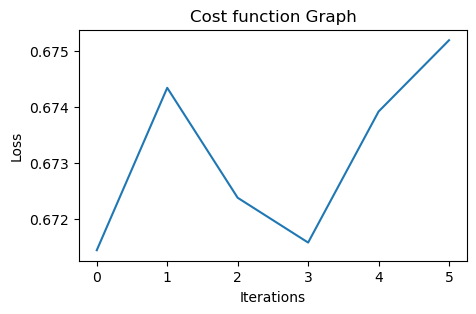

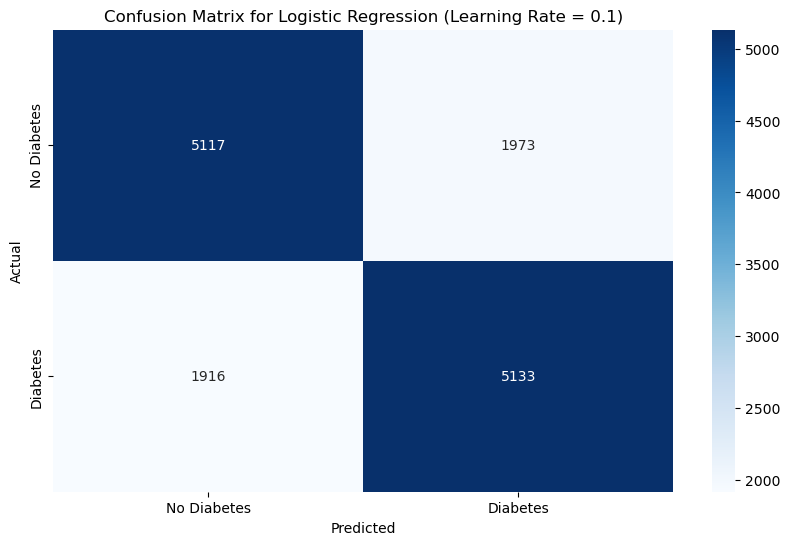

Classification Report for Logistic Regression (Learning Rate = 0.1):
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      7090
           1       0.72      0.73      0.73      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139

Specificity:         72.2 

Sensitivity:         72.8 (Recall)


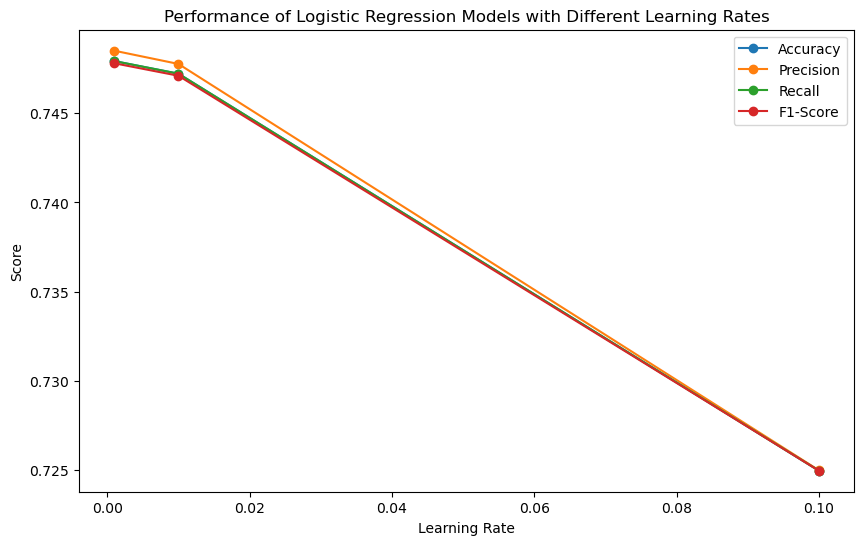

In [7]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import scipy 
from scipy import stats 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo 
import sys 
from io import StringIO
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

def standardize_data(data):
    data_standardized = data.copy()
    names = data.columns
    for name in names:
        data_standardized[name] = stats.zscore(data[name])
    return data_standardized

# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

X = standardize_data(X)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
y_resampled.value_counts().plot(kind = 'bar')
print("RandomUnderSampler:")
print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression models with different learning rates
learning_rates = [0.001, 0.01, 0.1]
log_reg_models = []
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for lr in learning_rates:
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    logr = SGDClassifier(loss='log_loss',learning_rate='constant',eta0=lr,max_iter=1000,random_state=42,verbose=3)
    log_reg_models.append(logr)
    logr.fit(X_train, np.ravel(y_train,order='C'))#y_resampled_smote)
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
        print(line)
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
        
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title('Cost function Graph')
    plt.rcParams["figure.figsize"] = (5,3)

    y_pred = logr.predict(X_test)

    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))

    # Plot confusion matrix for each learning rate
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = {lr})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report for each learning rate
    print(f'Classification Report for Logistic Regression (Learning Rate = {lr}):\n{classification_report(y_test, y_pred)}')
    TN, FP    = cm[0, 0], cm[0, 1]
    FN, TP    = cm[1, 0], cm[1, 1]
    
    print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
    print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")
# Plot the metrics of Logistic Regression models in a single graph
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, metrics['accuracy'], marker='o', label='Accuracy')
plt.plot(learning_rates, metrics['precision'], marker='o', label='Precision')
plt.plot(learning_rates, metrics['recall'], marker='o', label='Recall')
plt.plot(learning_rates, metrics['f1'], marker='o', label='F1-Score')
plt.title("Performance of Logistic Regression Models with Different Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.legend()
plt.show()